In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-10,10,100).reshape(-1,1)

In [3]:
y = 0.1 * x**4 + 1.2 * x**3 + 1.2 * x**2 + 2.1 * x 

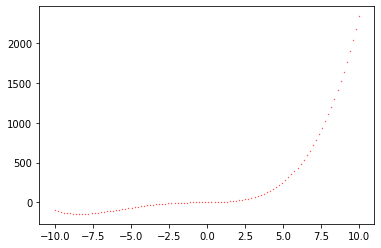

In [4]:
plt.scatter(x,y,color='r',s=0.1)

In [5]:
def model(w1,w2,x):
    assert(x.shape[1] == w1.shape[0])
    assert(w1.shape[1] == w2.shape[0])
    assert(w2.shape[1] == 1)
    layer = torch.sigmoid(x @ w1)
    return layer @ w2

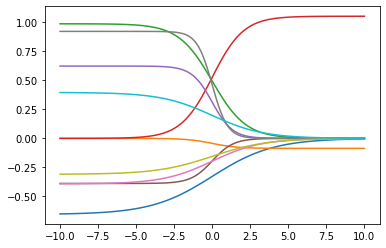

In [6]:
for i in range(10):
    w1 = torch.randn((1,1), requires_grad=True, dtype=torch.double) 
    w2 = torch.randn((1,1), requires_grad=True, dtype=torch.double) 
    y_pred = model(w1,w2,torch.tensor(x))
    y_pred = y_pred.detach().numpy()
    plt.plot(x,y_pred)

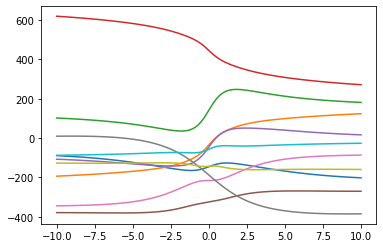

In [7]:
for i in range(10):
    w1 = torch.randn((1,100000), requires_grad=True, dtype=torch.double)
    w1.retain_grad()
    w2 = torch.randn((100000,1), requires_grad=True, dtype=torch.double)
    w2.retain_grad()
    y_pred = model(w1,w2,torch.tensor(x))
    y_pred = y_pred.detach().numpy()
    plt.plot(x,y_pred)

In [8]:
def train(X,y,alpha,epochs):
    
    X = torch.tensor(X,dtype=torch.double)
    y = torch.tensor(y,dtype=torch.double)
    
    hidden_layer_size = 1000
    w1 = torch.randn((1,hidden_layer_size), requires_grad=True, dtype=torch.double) 
    w2 = torch.randn((hidden_layer_size,1), requires_grad=True, dtype=torch.double)
    
    for i in range(epochs):
        
        for j in range(10):
            
            # Forward, on a batch
            prediction = model(w1,w2,X[j*10:(j+1)*10,:])
            error = torch.mean((prediction - y[j*10:(j+1)*10])**2)

            # Backward and parameter update
            error.backward()
            with torch.no_grad():
                w1 -= alpha * w1.grad
                w1.grad = None
                w2 -= alpha * w2.grad
                w2.grad = None

        if i%1000 == 0:
            with torch.no_grad():
                prediction = model(w1,w2,X)
                error = torch.mean((prediction - y)**2)
                print(error)                
                
    return (w1,w2)

tensor(234580.4852, dtype=torch.float64)
tensor(161539.2611, dtype=torch.float64)
tensor(158945.0919, dtype=torch.float64)
tensor(158122.6514, dtype=torch.float64)
tensor(157824.3680, dtype=torch.float64)
tensor(157707.8667, dtype=torch.float64)
tensor(157660.0997, dtype=torch.float64)
tensor(157639.4600, dtype=torch.float64)
tensor(157629.8257, dtype=torch.float64)
tensor(157624.8075, dtype=torch.float64)


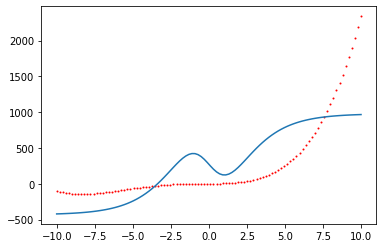

In [9]:
w1, w2 = train(x,y,0.0001,10000)
y_pred = model(w1,w2,torch.tensor(x))
y_pred = y_pred.detach().numpy()
plt.scatter(x,y,color='r',s=1.0)
plt.plot(x,y_pred)
plt.show()